<a href="https://colab.research.google.com/github/christyesmee/doorlock/blob/main/simulation_create_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#Generating the dataset

In [13]:
import csv
import random
import numpy as np
import itertools
import pandas as pd


# Define the layout of the keypad (x, y coordinates for each key)
keypad_layout = {
    '1': (0, 0), '2': (1, 0), '3': (2, 0),
    '4': (0, 1), '5': (1, 1), '6': (2, 1),
    '7': (0, 2), '8': (1, 2), '9': (2, 2),
    '0': (1, 3)
}

def calculate_realistic_distance(key1, key2, keypad_layout, key_spacing_cm, speed_cm_per_sec, min_press_time_sec):
    """
    Calculate the realistic time interval between two keys based on their distance
    and the assumed speed of key presses.
    """
    if key1 == key2:
      return min_press_time_sec
    else:
      pos1 = keypad_layout[key1]
      pos2 = keypad_layout[key2]
      distance_cm = np.sqrt((pos1[0] - pos2[0])**2 + (pos1[1] - pos2[1])**2) * key_spacing_cm
      time_sec = distance_cm / speed_cm_per_sec
      return time_sec

def generate_realistic_intervals(num_samples, keypad_layout, key_spacing_cm, speed_cm_per_sec):
    """
    Generate realistic intervals based on the physical layout of the keypad and
    the assumed speed of key presses.
    """
    intervals = []
    all_keys = list(keypad_layout.keys())

    for _ in range(num_samples):
        # Randomly select 4 keys to simulate a password
        password_keys = random.sample(all_keys, 4)

        # Calculate realistic time intervals between key presses
        time_intervals = [
            calculate_realistic_distance(password_keys[i], password_keys[i+1], keypad_layout, key_spacing_cm, speed_cm_per_sec, min_press_time_sec)
            for i in range(3)
        ]

        intervals.append(time_intervals)

    return intervals

# Key spacing in cm and assumed speed in cm/sec
key_spacing_cm = 1.5  # Assuming each key is 1.5 cm apart
speed_cm_per_sec = 5   # Assuming a speed of 5 cm/secc
min_press_time_sec = 0.2  # Assuming a minimum time of 0.2 sec for a key press


# Enter the desired amount of realistic intervals that should be generated
amount_intervals = int(input("Enter number of different interval combinations "))

# Generate realistic intervals
realistic_intervals = generate_realistic_intervals(amount_intervals, keypad_layout, key_spacing_cm, speed_cm_per_sec)

# Save the intervals to a CSV file
csv_filename = '/content/drive/My Drive/Internet of Things Security/dataset1.csv'
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Interval 1 (sec)', 'Interval 2 (sec)', 'Interval 3 (sec)'])  # Header
    for interval_set in realistic_intervals:
        writer.writerow(interval_set)


# Path to the CSV file in Google Drive
csv_file_path = '/content/drive/My Drive/Internet of Things Security/dataset1.csv'

# Reading the CSV file
data = pd.read_csv(csv_file_path)
print(data.head())


Enter number of different interval combinations 3
   Interval 1 (sec)  Interval 2 (sec)  Interval 3 (sec)
0          0.670820          0.424264          0.424264
1          0.424264          0.300000          0.300000
2          0.600000          0.670820          0.600000


#Checking all possible outcomes

This cell will output all the possible key pairs for the intervals. It will also show how long each interval takes in seconds.

In [4]:
# Iterate over all pairs of keys and group them by their interval
key_pairs_by_interval = {}
for key1, key2 in itertools.product(keypad_layout.keys(), repeat=2):
    interval = calculate_realistic_distance(key1, key2, keypad_layout, key_spacing_cm, speed_cm_per_sec, min_press_time_sec)
    interval = round(interval, 4)  # Round to 4 decimal places for grouping

    if interval not in key_pairs_by_interval:
        key_pairs_by_interval[interval] = []
    key_pairs_by_interval[interval].append(f"{key1}-{key2}")

# Display the results
for interval in sorted(key_pairs_by_interval.keys()):
    print(f"Interval: {interval}, All possible key pairs: {', '.join(key_pairs_by_interval[interval])}")

# Optional: Write these results to a new CSV file if needed


Interval: 0.2, All possible key pairs: 1-1, 2-2, 3-3, 4-4, 5-5, 6-6, 7-7, 8-8, 9-9, 0-0
Interval: 0.3, All possible key pairs: 1-2, 1-4, 2-1, 2-3, 2-5, 3-2, 3-6, 4-1, 4-5, 4-7, 5-2, 5-4, 5-6, 5-8, 6-3, 6-5, 6-9, 7-4, 7-8, 8-5, 8-7, 8-9, 8-0, 9-6, 9-8, 0-8
Interval: 0.4243, All possible key pairs: 1-5, 2-4, 2-6, 3-5, 4-2, 4-8, 5-1, 5-3, 5-7, 5-9, 6-2, 6-8, 7-5, 7-0, 8-4, 8-6, 9-5, 9-0, 0-7, 0-9
Interval: 0.6, All possible key pairs: 1-3, 1-7, 2-8, 3-1, 3-9, 4-6, 5-0, 6-4, 7-1, 7-9, 8-2, 9-3, 9-7, 0-5
Interval: 0.6708, All possible key pairs: 1-6, 1-8, 2-7, 2-9, 3-4, 3-8, 4-3, 4-9, 4-0, 6-1, 6-7, 6-0, 7-2, 7-6, 8-1, 8-3, 9-2, 9-4, 0-4, 0-6
Interval: 0.8485, All possible key pairs: 1-9, 3-7, 7-3, 9-1
Interval: 0.9, All possible key pairs: 2-0, 0-2
Interval: 0.9487, All possible key pairs: 1-0, 3-0, 0-1, 0-3


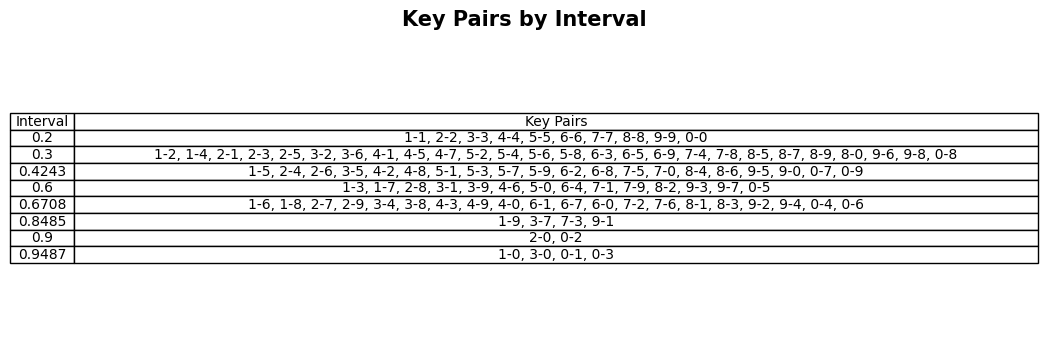

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'key_pairs_by_interval' is already defined as in your code

# Convert the data into a list of tuples for easier handling
data = [(interval, ', '.join(pairs)) for interval, pairs in sorted(key_pairs_by_interval.items())]

# Create a DataFrame for better control over table generation
df = pd.DataFrame(data, columns=['Interval', 'Key Pairs'])

# Plotting without the axes for a clean table look
fig, ax = plt.subplots(figsize=(10, len(df) * 0.5))  # Adjust the size as needed
ax.axis('off')
ax.axis('tight')

# Create the table and customize
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)  # Adjust font size as needed
table.auto_set_column_width(col=list(range(len(df.columns))))  # Adjust column widths

plt.title('Key Pairs by Interval', fontsize=15, weight='bold')

# Save the table as an image
plt.savefig('/content/drive/My Drive/Internet of Things Security/key_pairs_table.png', bbox_inches='tight', dpi=300)  # High dpi for better quality

plt.show()


#Importing the dataset

In [ ]:
import pandas as pd

# Path to the CSV file in Google Drive
csv_file_path = '/content/drive/My Drive/Internet of Things Security/dataset1.csv'

# Reading the CSV file
data = pd.read_csv(csv_file_path)
print(data.head())

   Interval 1 (sec)  Interval 2 (sec)  Interval 3 (sec)
0          0.424264          0.424264          0.948683
1          0.300000          0.948683          0.424264
2          0.424264          0.600000          0.424264
3          0.848528          0.600000          0.670820
4          0.424264          0.300000          0.600000


#All possible combinations for each interval

In [ ]:
import itertools


def find_possible_combinations_with_interval(intervals, keypad_layout, key_spacing_cm, speed_cm_per_sec, tolerance=0.01):
    possible_combinations_with_interval = []

    for interval_set in intervals:
        combinations_for_interval = []
        all_keys = keypad_layout.keys()

        # Iterate over all 4-key combinations
        for combination in itertools.product(all_keys, repeat=4):
            # Calculate realistic time intervals between key presses
            time_intervals = [
                calculate_realistic_distance(combination[i], combination[i+1], keypad_layout, key_spacing_cm, speed_cm_per_sec, min_press_time_sec)
                for i in range(len(combination) - 1)
            ]

            # Check if the time intervals match the intervals within the tolerance
            if all(abs(time - interval) <= tolerance for time, interval in zip(time_intervals, interval_set)):
                combinations_for_interval.append(combination)

        if combinations_for_interval:
            # Round the interval values for display purposes
            rounded_interval_set = [round(interval, 3) for interval in interval_set]
            possible_combinations_with_interval.append((rounded_interval_set, combinations_for_interval))

    return possible_combinations_with_interval


def read_intervals_from_csv(file_path, num_rows):
    intervals = []
    with open(file_path, mode='r') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # Skip the header row
        for i, row in enumerate(csv_reader):
            if i >= num_rows:
                break
            intervals.append([float(interval) for interval in row])
    return intervals

# Path to the CSV file containing the intervals
csv_file_path = '/content/drive/My Drive/Internet of Things Security/dataset1.csv'

# User input for the number of passwords to process
num_passwords_to_process = int(input("Enter the number of passwords to process: "))

# Read intervals from the CSV file
placeholder_intervals = read_intervals_from_csv(csv_file_path, num_passwords_to_process)



# Find possible combinations for each set of intervals from the dataset
possible_passwords_with_intervals = find_possible_combinations_with_interval(placeholder_intervals, keypad_layout, key_spacing_cm, speed_cm_per_sec, tolerance=0.01)

# Display the results
for interval, passwords in possible_passwords_with_intervals[:num_passwords_to_process]:
    print(f"Interval: {interval}, Possible Passwords: {passwords[:]}")



Enter the number of passwords to process: 10
Interval: [0.424, 0.424, 0.949], Possible Passwords: [('1', '5', '1', '0'), ('1', '5', '3', '0'), ('3', '5', '1', '0'), ('3', '5', '3', '0'), ('5', '7', '0', '1'), ('5', '7', '0', '3'), ('5', '9', '0', '1'), ('5', '9', '0', '3'), ('7', '5', '1', '0'), ('7', '5', '3', '0'), ('9', '5', '1', '0'), ('9', '5', '3', '0'), ('0', '7', '0', '1'), ('0', '7', '0', '3'), ('0', '9', '0', '1'), ('0', '9', '0', '3')]
Interval: [0.3, 0.949, 0.424], Possible Passwords: [('2', '1', '0', '7'), ('2', '1', '0', '9'), ('2', '3', '0', '7'), ('2', '3', '0', '9'), ('4', '1', '0', '7'), ('4', '1', '0', '9'), ('6', '3', '0', '7'), ('6', '3', '0', '9'), ('8', '0', '1', '5'), ('8', '0', '3', '5')]
Interval: [0.424, 0.6, 0.424], Possible Passwords: [('1', '5', '0', '7'), ('1', '5', '0', '9'), ('2', '4', '6', '2'), ('2', '4', '6', '8'), ('2', '6', '4', '2'), ('2', '6', '4', '8'), ('3', '5', '0', '7'), ('3', '5', '0', '9'), ('4', '2', '8', '4'), ('4', '2', '8', '6'), ('4',

#Export output to csv


In [ ]:
import csv

# Function definitions (calculate_realistic_distance, find_possible_combinations_with_interval, etc.) remain the same

def write_output_to_csv(data, file_path):
    # Determine the maximum number of passwords for any interval
    max_passwords = max(len(passwords) for _, passwords in data)

    # Prepare the header with dynamic columns for possible passwords
    header = ['Interval 1 (sec)', 'Interval 2 (sec)', 'Interval 3 (sec)'] + [f'ppwd{i+1}' for i in range(max_passwords)]

    with open(file_path, mode='w', newline='') as file:
        csv_writer = csv.writer(file)
        csv_writer.writerow(header)

        for interval, passwords in data:
            # Format each password as a string, preserving leading zeros
            passwords_str = [''.join('{:01d}'.format(int(key)) for key in password) for password in passwords]
            # Pad the list of passwords to match the length of the header
            row = [*interval] + passwords_str + [''] * (max_passwords - len(passwords_str))
            csv_writer.writerow(row)

# Specify the path for the output CSV file
output_csv_file_path = '/content/drive/My Drive/Internet of Things Security/output_file.csv'


# Find possible combinations for each set of intervals from the dataset
possible_passwords_with_intervals = find_possible_combinations_with_interval(
    placeholder_intervals,
    keypad_layout,
    key_spacing_cm,
    speed_cm_per_sec,
    tolerance=0.01  # Adjust the tolerance as needed
)

# Write the output to the CSV file
write_output_to_csv(possible_passwords_with_intervals, output_csv_file_path)


#Check for duplicates in csv

In [ ]:
def check_for_duplicates(data):
    for interval, passwords in data:
        if len(passwords) != len(set(passwords)):
            return True  # Found duplicates
    return False  # No duplicates found

# Assuming possible_passwords_with_intervals is already defined
has_duplicates = check_for_duplicates(possible_passwords_with_intervals)
print("Duplicates found:", has_duplicates)


Duplicates found: False
